In [1]:
import sys
sys.path.append('../../')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils.plot_utils import generate_prediction_mask, generate_original_mask
from utils.slide_utils import get_meta_info_with_train_test_split
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
SAMPLE_IMG_ID = '078'

In [5]:
slide_img, truth_mask_img = generate_original_mask(SAMPLE_IMG_ID)
_, pred_mask_img = generate_prediction_mask('vgg16_transfer',
                                            'zoom_1_256_256',
                                            'test',
                                            SAMPLE_IMG_ID)

In [6]:
smoothed_pred_mask = cv2.blur(pred_mask_img, (7, 7))

In [7]:
def plot_original_vs_pred_heatmap(img_id,
                                  slide_img,
                                  truth_mask_img,
                                  pred_mask_img):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7), dpi=100)

    # plt.figure(figsize=(6, 6), dpi=100)
    axes[0].imshow(slide_img,)
    axes[0].imshow(truth_mask_img, alpha=0.5)

    temp = axes[1].imshow(pred_mask_img, cmap='jet', interpolation='nearest')
    plt.colorbar(temp, fraction=0.053, pad=0.06, ax=axes[1])
    plt.axis('off')
    axes[1].set_title('Slide {} Prediction Heatmap'.format(img_id))

    plt.tight_layout()
    plt.show()

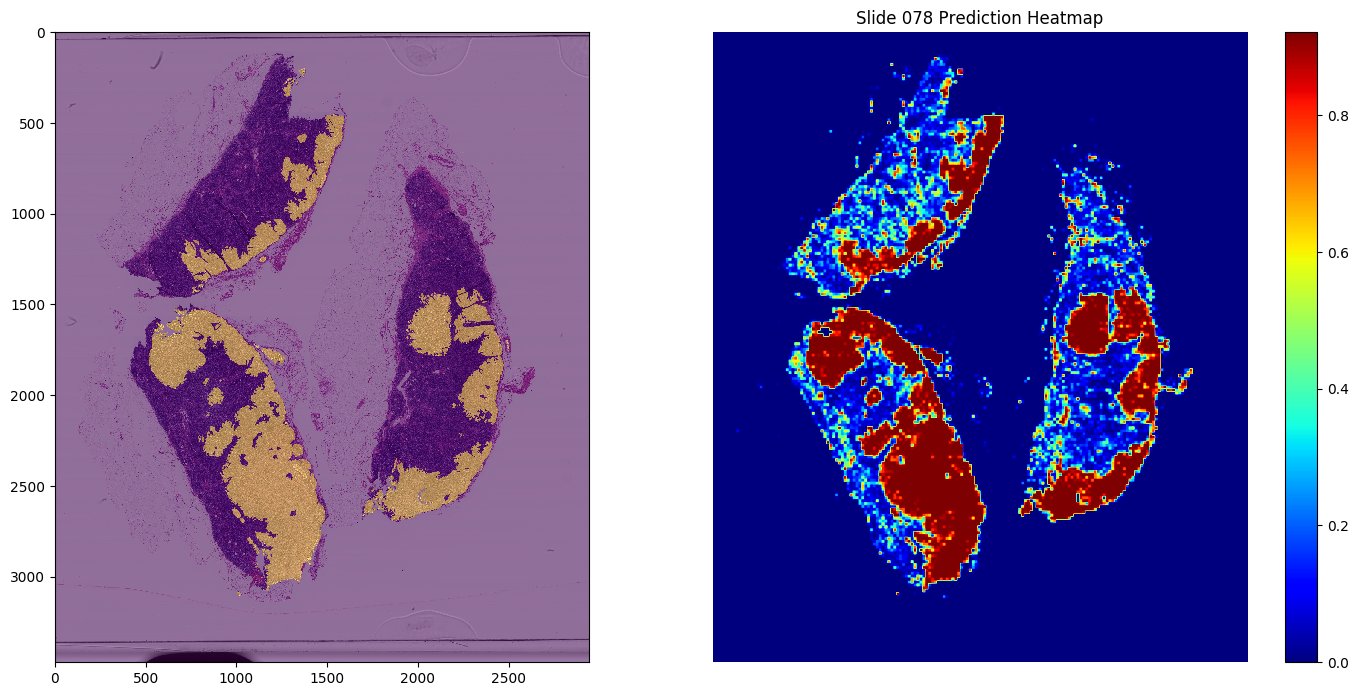

In [8]:
plot_original_vs_pred_heatmap(SAMPLE_IMG_ID,
                              slide_img,
                              truth_mask_img,
                              smoothed_pred_mask)

In [9]:
meta_df = get_meta_info_with_train_test_split()

### Test Images Heatmap

In [10]:
test_imges = meta_df.loc[meta_df['type'] == 'test', 'img_id'].values

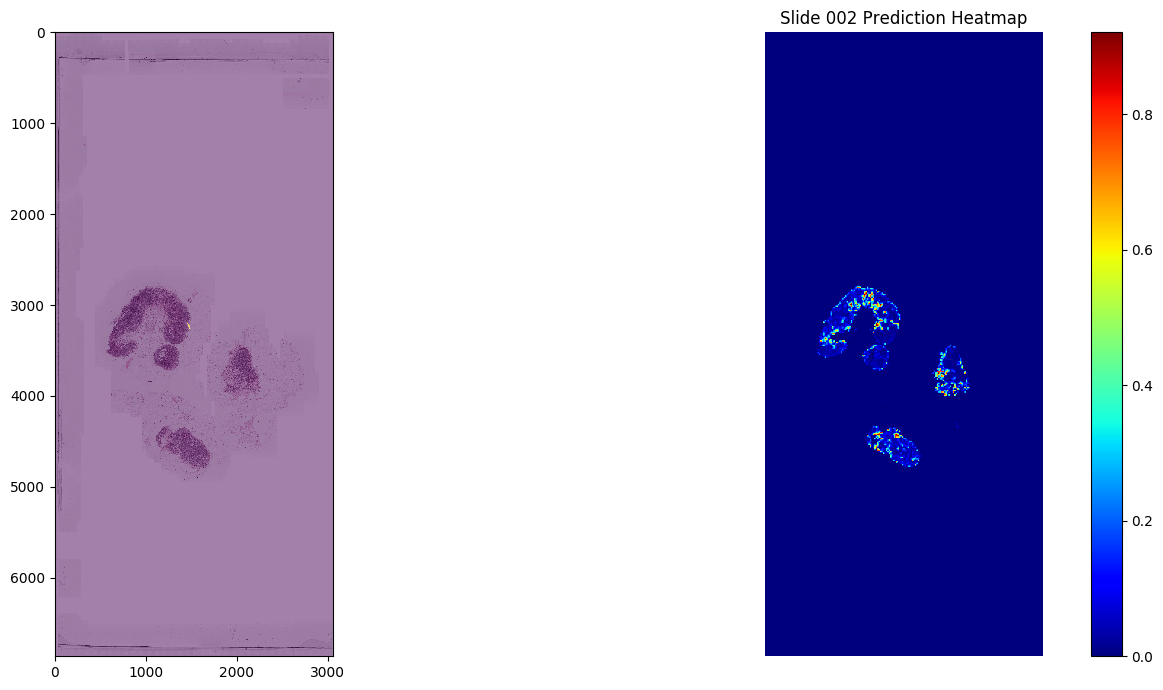

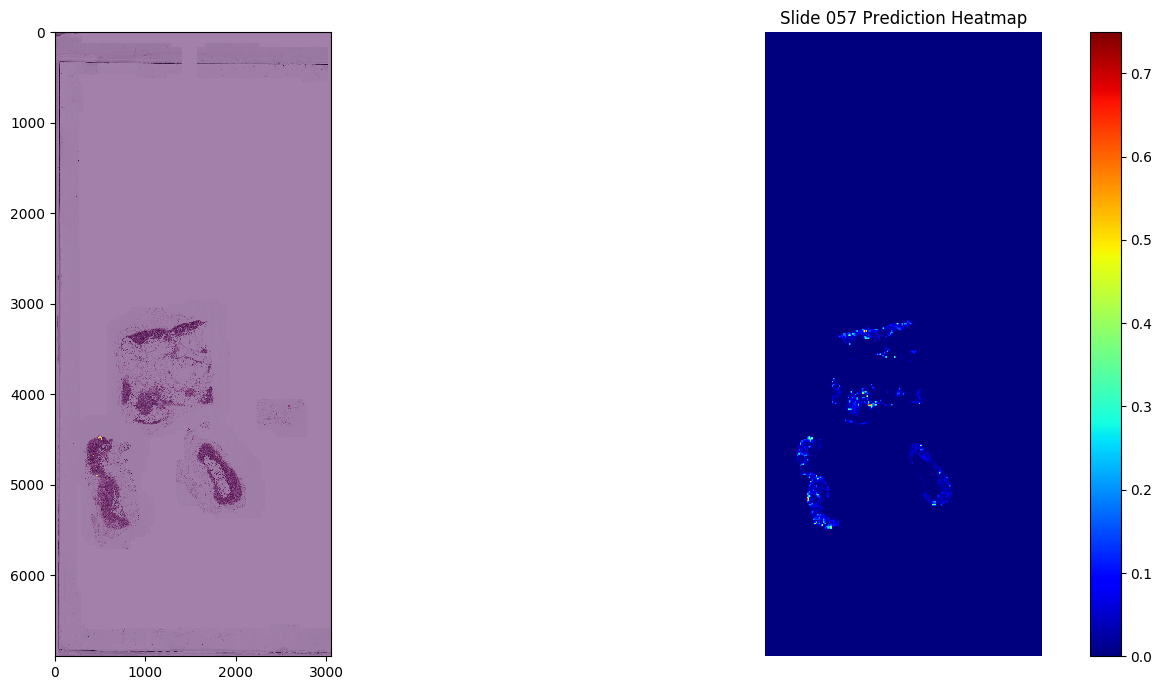

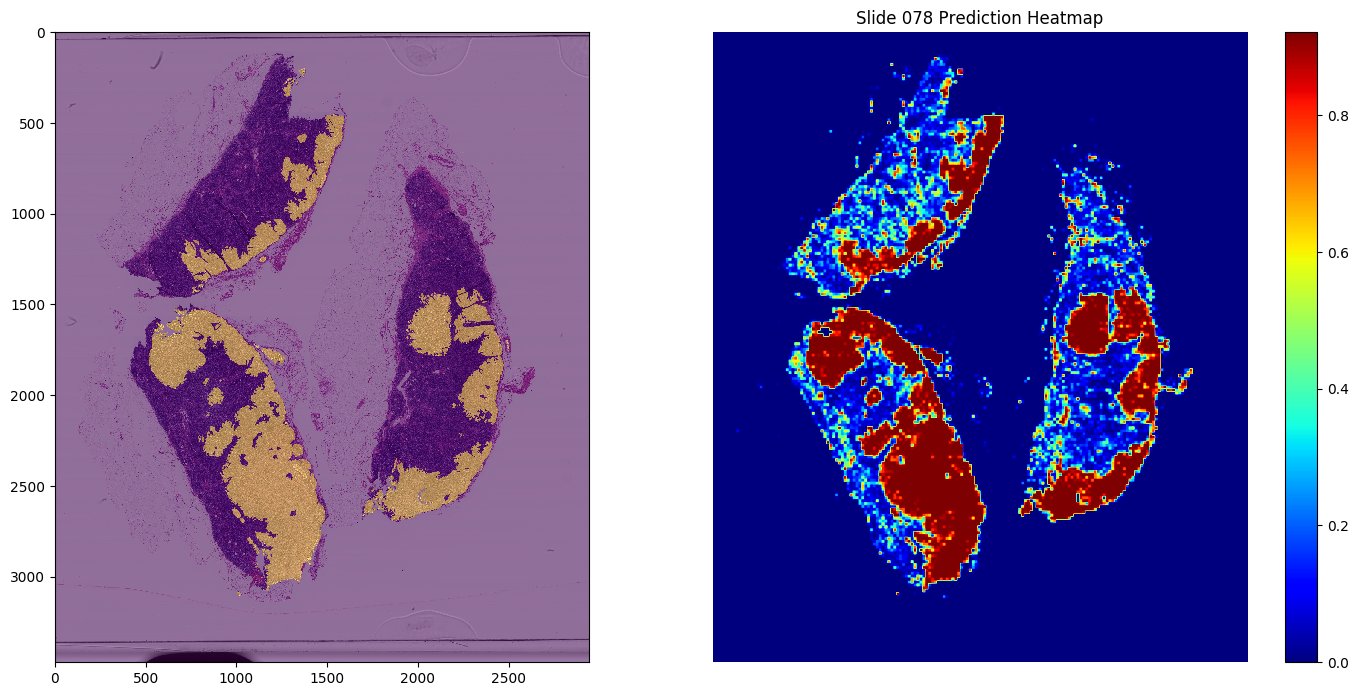

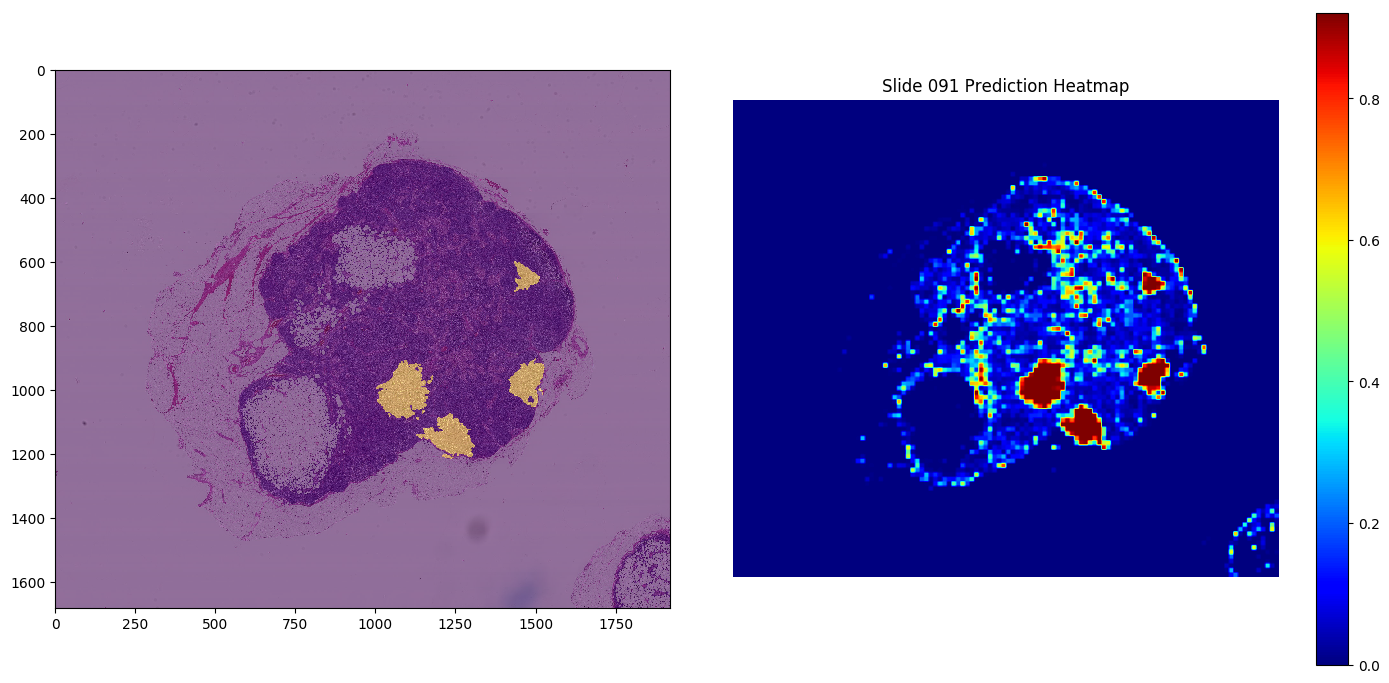

In [11]:
for img_id in test_imges:
    slide_img, truth_mask_img = generate_original_mask(img_id)
    _, pred_mask_img = generate_prediction_mask('vgg16_transfer',
                                                'zoom_1_256_256',
                                                'test',
                                                img_id)
    
    smoothed_pred_mask = cv2.blur(pred_mask_img, (7, 7))
    plot_original_vs_pred_heatmap(img_id,
                                  slide_img,
                                  truth_mask_img,
                                  smoothed_pred_mask)

### Val Images Heatmap

In [12]:
val_imges = meta_df.loc[meta_df['type'] == 'val', 'img_id'].values

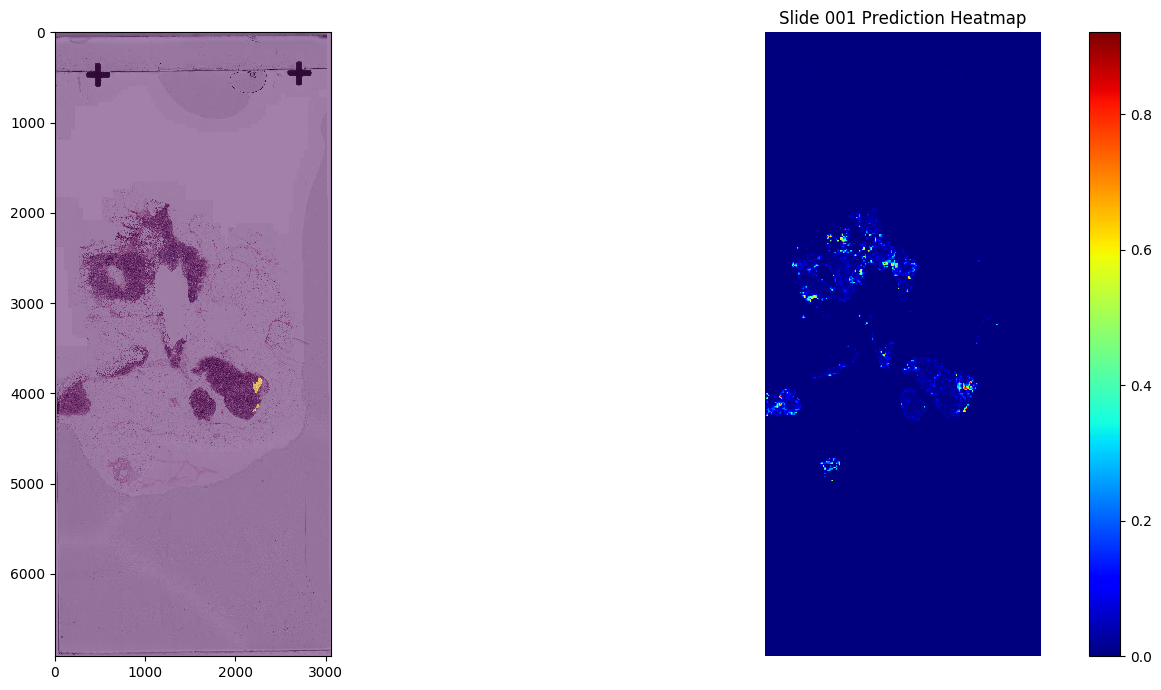

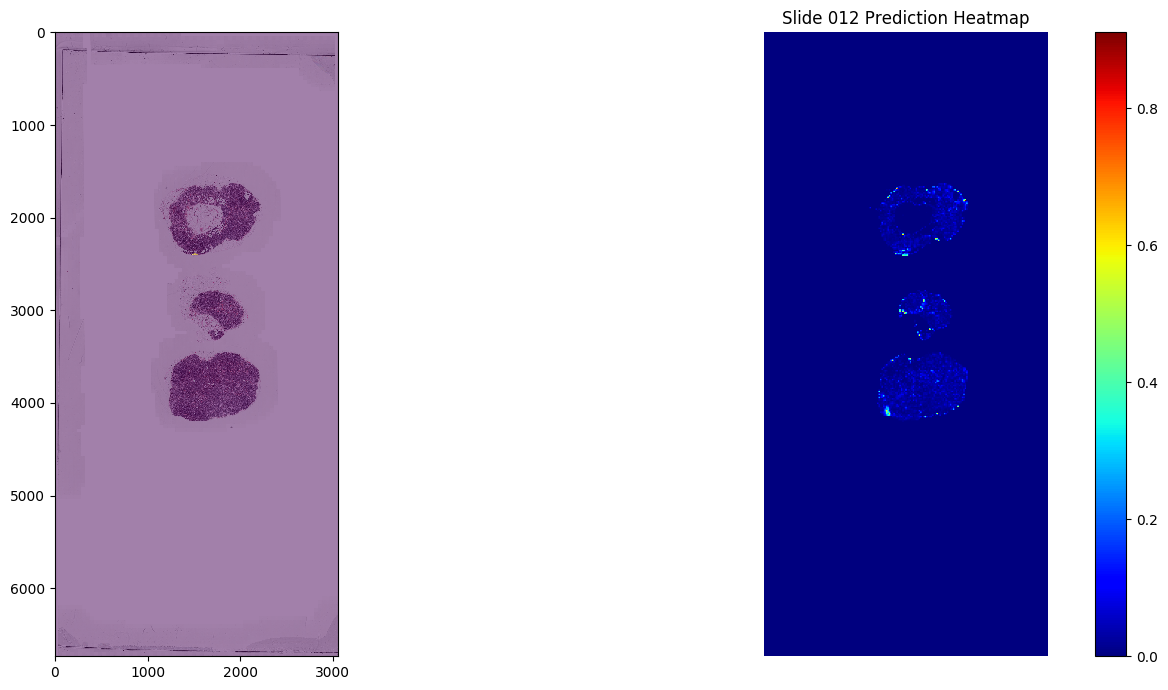

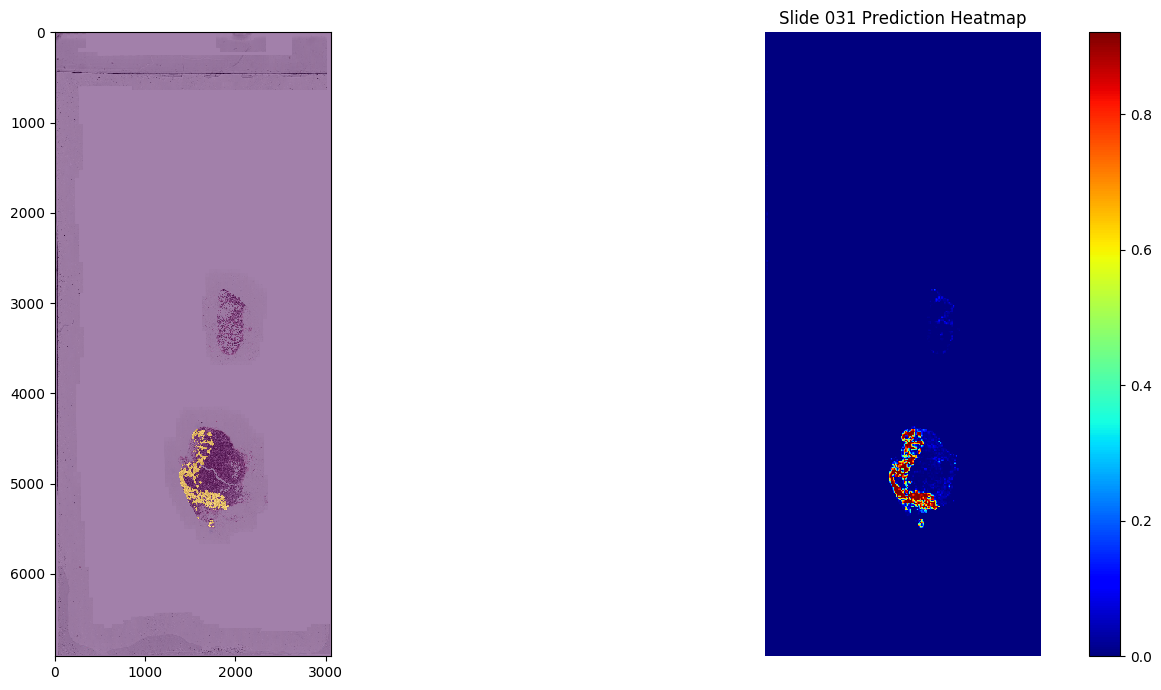

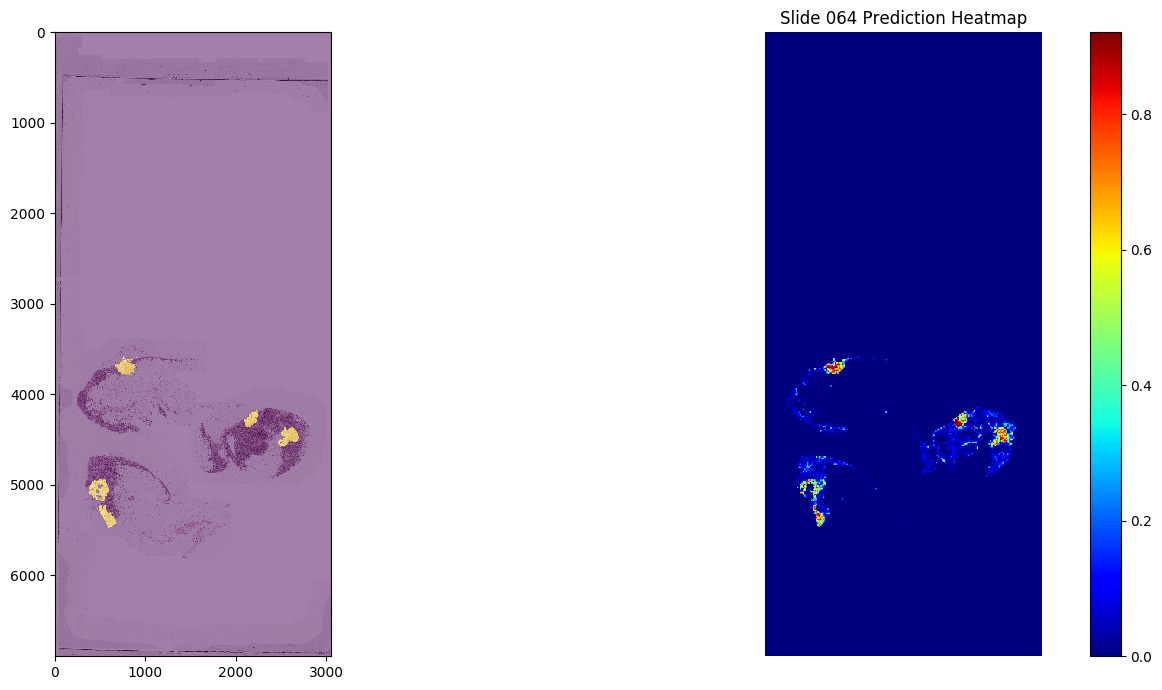

In [14]:
for img_id in val_imges:
    slide_img, truth_mask_img = generate_original_mask(img_id)
    _, pred_mask_img = generate_prediction_mask('vgg16_transfer',
                                                'zoom_1_256_256',
                                                'val',
                                                img_id)
    
    smoothed_pred_mask = cv2.blur(pred_mask_img, (7, 7))
    plot_original_vs_pred_heatmap(img_id,
                                  slide_img,
                                  truth_mask_img,
                                  smoothed_pred_mask)